In [62]:
pip install scipy

In [10]:
import numpy as np
from scipy.optimize import minimize


# def eval_3rd_degree(coeffs, x):
#     # Assuming x is a vector [x, y, z]
#     return (coeffs[0]*x[0]**3 + coeffs[1]*x[1]**3 + coeffs[2]*x[2]**3 +
#             coeffs[3]*x[0]**2*x[1] + coeffs[4]*x[0]**2*x[2] + coeffs[5]*x[1]**2*x[0] +
#             coeffs[6]*x[1]**2*x[2] + coeffs[7]*x[2]**2*x[0] + coeffs[8]*x[2]**2*x[1] +
#             coeffs[9]*x[0]*x[1]*x[2] +
#             coeffs[10]*x[0]**2 + coeffs[11]*x[1]**2 + coeffs[12]*x[2]**2 +
#             coeffs[13]*x[0]*x[1] + coeffs[14]*x[0]*x[2] + coeffs[15]*x[1]*x[2] +
#             coeffs[16]*x[0] + coeffs[17]*x[1] + coeffs[18]*x[2] +
#             coeffs[19])

# def eval_2nd_degree(coeffs, x):
#     # x is expected to be a list or array with three elements [x, y, z]
#     return (coeffs[0]*x[0]**2+ coeffs[1]*x[1]+coeffs[2]*x[1]**2+coeffs[3]*x[2]**2
#     +coeffs[4]+coeffs[5]*x[0]+coeffs[6]*x[2]+coeffs[7]*x[1]*x[2]+coeffs[8]*x[0]*x[2])


# def eval_2nd_degree(coeffs, x):
#     # x is expected to be a list or array with three elements [x, y, z]
#     return (coeffs[0]*x[0]**2 + coeffs[1]*x[1]**2 + coeffs[2]*x[2]**2 +
#             coeffs[3]*x[0]*x[1] + coeffs[4]*x[0]*x[2] + coeffs[5]*x[1]*x[2] +
#             coeffs[6]*x[0] + coeffs[7]*x[1] + coeffs[8]*x[2] +
#             coeffs[9])

def eval_2nd_degree(coeffs, x):
    return coeffs[0]*x[0]**2 + coeffs[1]*x[1]**2 + coeffs[2]*x[0]*x[1] + coeffs[3]*x[0] + coeffs[4]*x[1] + coeffs[5]

def objective_function(coeffs, data_points):
    return sum([eval_2nd_degree(coeffs, x)**2 for x in data_points])

def constraint(coeffs):
    return np.sum((coeffs)**2) - 1


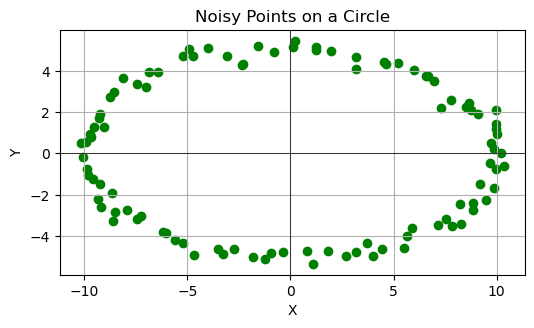

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Adding noise to the original circular data
#np.random.seed(0)  # For reproducibility
noise_level = 0.3 # Adjust the noise level as needed

angle = np.linspace(0, 2 * np.pi, 100)
radius = 5
x = radius * 2*np.cos(angle)
y = radius * np.sin(angle)
x_y_pairs = np.column_stack((x, y))

# points=np.linspace(-1,1,100)
# x=points
# y=points**2
# z=points**3
# x_y_z_pair=np.column_stack((x,y,z))



# Add random noise to x and y
x_noisy = x + np.random.normal(0, noise_level, x.shape)
y_noisy = y + np.random.normal(0, noise_level, y.shape)
x_y_pairs_noisy = np.column_stack((x_noisy, y_noisy))

# Plotting the noisy data
plt.figure(figsize=(6, 6))
plt.scatter(x_y_pairs_noisy[:, 0], x_y_pairs_noisy[:, 1], color='green')
plt.title('Noisy Points on a Circle')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



# # Generate the points
# points = np.linspace(-1, 1, 100)
# x = points
# y = points**2
# z = points**3
# x_y_z_pair = np.column_stack((x, y, z))

# # Plotting
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x_y_z_pair[:, 0], x_y_z_pair[:, 1], x_y_z_pair[:, 2], color='blue')
# ax.set_xlabel('X axis')
# ax.set_ylabel('Y axis')
# ax.set_zlabel('Z axis')
# ax.set_title('3D Plot of the Points')
# plt.show()


In [12]:
cons = ({'type': 'eq', 'fun': constraint})

initial_guess = np.random.uniform(-1, 1, 6)

result = minimize(objective_function, initial_guess, args=(x_y_pairs_noisy), constraints=cons,method='SLSQP')
best_fit_coeffs = result.x
print("Best fit coefficients:", best_fit_coeffs)


# def eval_2nd_order(coeffs, x):
#     # x is expected to be a list or array with three elements [x, y, z]
#     return (coeffs[0]*x[0]**2 + coeffs[1]*x[1]**2 + coeffs[2]*x[2]**2 +
#             coeffs[3]*x[0]*x[1] + coeffs[4]*x[0]*x[2] + coeffs[5]*x[1]*x[2] +
#             coeffs[6]*x[0] + coeffs[7]*x[1] + coeffs[8]*x[2] +
#             coeffs[9])


Best fit coefficients: [-9.92471927e-03 -3.86775048e-02 -1.07886992e-03 -6.71357846e-04
  4.11014059e-04  9.99201592e-01]


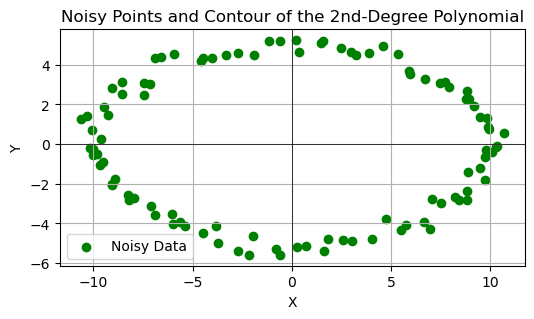

In [5]:
x_range = np.linspace(-1.5, 1.5, 400)
y_range = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_range, y_range)

def eval_2nd_degree(coeffs, x, y):
    return coeffs[0]*x**2 + coeffs[1]*y**2 + coeffs[2]*x*y + coeffs[3]*x + coeffs[4]*y + coeffs[5]

# Evaluate the polynomial on the grid
Z = eval_2nd_degree(best_fit_coeffs, X, Y)

# Plotting the noisy data points and the contour of the polynomial
plt.figure(figsize=(6, 6))
plt.scatter(x_y_pairs_noisy[:, 0], x_y_pairs_noisy[:, 1], color='green', label='Noisy Data')
plt.contour(X, Y, Z, levels=[0], colors='blue')  # Contour at level 0
plt.title('Noisy Points and Contour of the 2nd-Degree Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

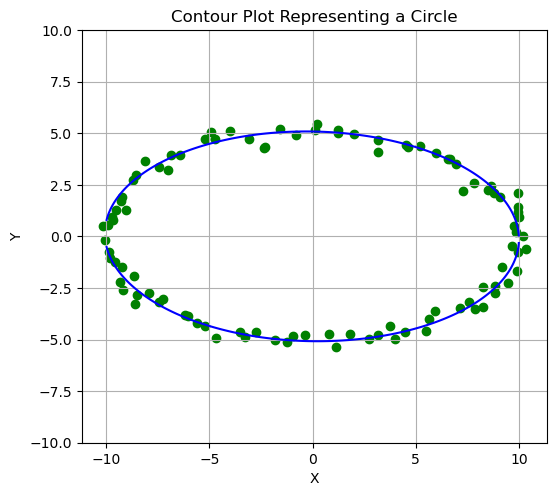

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def eval_2nd_degree(coeffs, x, y):
    return coeffs[0]*x**2 + coeffs[1]*y**2 + coeffs[2]*x*y + coeffs[3]*x + coeffs[4]*y + coeffs[5]

# Use your best fit coefficients here
#best_fit_coeffs = [1, 1, 0, 0, 0, -25]  # Example coefficients for a circle

# Generate a grid of x and y values
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)

# Evaluate the polynomial on the grid
Z = eval_2nd_degree(best_fit_coeffs, X, Y)

# Plotting the contour at level 0 (which should represent the circle)
plt.figure(figsize=(6, 6))
plt.scatter(x_y_pairs_noisy[:, 0], x_y_pairs_noisy[:, 1], color='green', label='Noisy Data')
plt.contour(X, Y, Z, levels=[0], colors='blue')  # Level curve at 0
plt.title('Contour Plot Representing a Circle')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Set equal scaling
plt.show()
